# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [162]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # библиотека для интерактивных карт

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [164]:
data = pd.read_csv('yelp_business.csv')
data.head(5)

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [165]:
# Группировка данных по городам и подсчет количества компаний в каждом городе
city_counts = data.groupby('city').size().reset_index(name='count')

# Сортировка данных по количеству компаний в порядке убывания
sorted_city_counts = city_counts.sort_values(by='count', ascending=False)
sorted_city_counts.head(5)


city  count
424   Las Vegas  26775
713     Phoenix  17213
983     Toronto  17206
143   Charlotte   8553
871  Scottsdale   8228

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

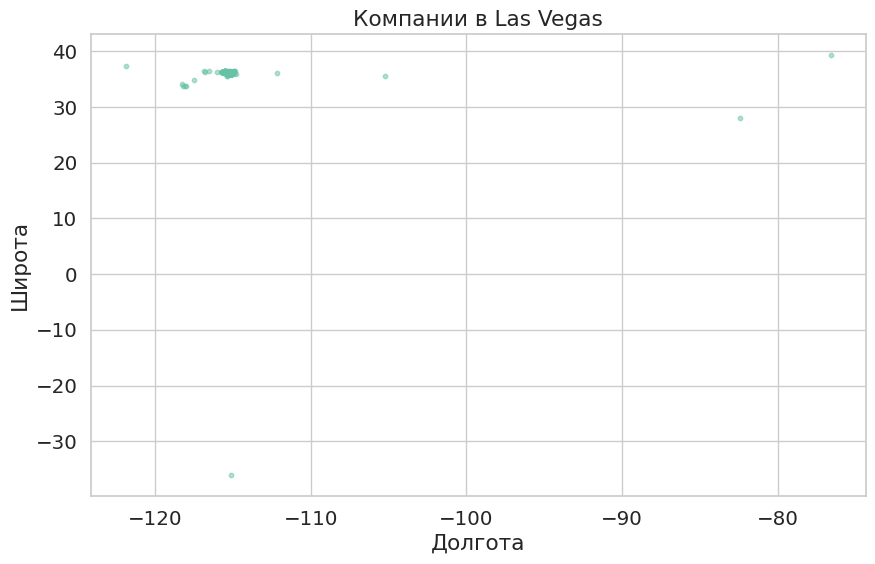

In [166]:
# Находим город с наибольшим количеством компаний
city_with_most_companies = data['city'].value_counts().idxmax()

# Фильтруем записи только для этого города
companies_in_city = data[data['city'] == city_with_most_companies]

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(companies_in_city['longitude'], companies_in_city['latitude'], s=10, alpha=0.5)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title(f'Компании в {city_with_most_companies}')
plt.grid(True)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

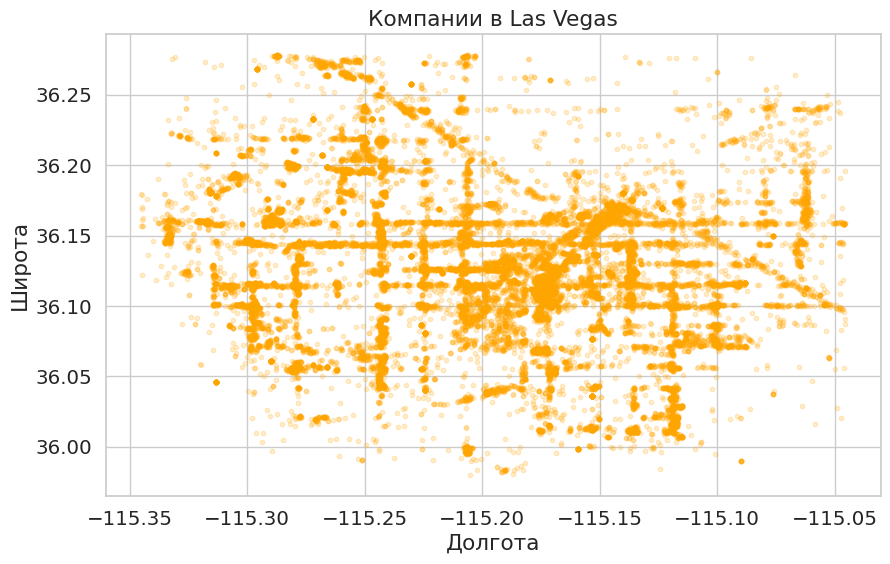

In [167]:
# Отфильтровываем компании в пределах границ города
city_center = companies_in_city[['latitude', 'longitude']].mean()

# Определяем примерный радиус города
radius = 0.15

# Фильтруем компании в пределах радиуса от центра города
filtered_companies = companies_in_city[
    (companies_in_city['latitude'] >= city_center['latitude'] - radius) &
    (companies_in_city['latitude'] <= city_center['latitude'] + radius) &
    (companies_in_city['longitude'] >= city_center['longitude'] - radius) &
    (companies_in_city['longitude'] <= city_center['longitude'] + radius)
]

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(filtered_companies['longitude'], filtered_companies['latitude'], s=10, c='orange', alpha=0.2)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title(f'Компании в {city_with_most_companies}')
plt.grid(True)
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [168]:
radius = 0.3

# Фильтруем компании в пределах радиуса от центра города
filtered_companies = companies_in_city[
    (companies_in_city['latitude'] >= city_center['latitude'] - radius) &
    (companies_in_city['latitude'] <= city_center['latitude'] + radius) &
    (companies_in_city['longitude'] >= city_center['longitude'] - radius) &
    (companies_in_city['longitude'] <= city_center['longitude'] + radius)
]

# Создаем DataFrame для передачи данных в Plotly
fig = px.scatter_mapbox(filtered_companies, lat="latitude", lon="longitude",
                        hover_name="name", hover_data=["address"],
                        color_discrete_sequence=["blue"], zoom=11)

# Настраиваем параметры карты
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title=f'Компании в {city_with_most_companies}')

# Отображаем карту и сохраняем карту
fig.show()
fig.write_html("interactive_map1_Companies_in_Las_Vegas.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [169]:
data_review = pd.read_csv('yelp_review.csv')

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [170]:
# Меняем индексы
data_review.set_index('business_id', inplace=True)
companies_in_city.set_index('business_id', inplace=True)

# Выбираем компании из города N
ratings_city_N = data_review.loc[companies_in_city.index]

# Восстанавливаем индекс в поле таблицы
ratings_city_N.reset_index(inplace=True)
data_review.reset_index(inplace=True)

# Удаляем колонку Unnamed 0, которая до этого была индексом
if 'Unnamed: 0' in ratings_city_N.columns:
  ratings_city_N.drop('Unnamed: 0', axis=1, inplace=True)

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [171]:
# Считаем среднее для каждой компании
average_ratings = ratings_city_N.groupby('business_id').aggregate([np.mean, np.size])

# После группировки получаем многоуровневую таблицу, убираем лишний уровень, чтобы сделать позже join
average_ratings.columns = average_ratings.columns.droplevel()

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [172]:
# Меняем названия колонок
average_ratings = average_ratings.rename(columns={'mean': 'Average rating', 'size': 'Count of reviews'})

average_ratings.head(5)

Average rating  Count of reviews
business_id                                             
--9e1ONYQuAa-CB_Rrw7Tw        4.088904              1451
--DdmeR16TRb3LsjG0ejrQ        3.200000                 5
--WsruI0IGEoeRmkErU5Gg        4.928571                14
--Y7NhBKzLTbNliMUX_wfg        4.875000                 8
--e8PjCNhEz32pprnPhCwQ        3.473684                19

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [173]:
# Соединяем таблицы
merged_table = companies_in_city.join(average_ratings)

# Выбираем только нужные колонки
merged_table = merged_table[['latitude', 'longitude', 'categories', 'name', 'Average rating', 'Count of reviews']]
merged_table.head(5)

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name  Average rating  Count of reviews  
business_id                                                                    
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"        4.000000                 5  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"        1.444444                 9  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"        4.739130                23  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"        4.450000                20  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"        3.680000                25

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [174]:
# Прозрачность 0.3 я не выставлял, так как на карте тогда точки становятся практически невидимыми. Такая прозрачность предназначена для графиков.

# Задаем DataFrame и передаем его в конструктор карты
fig = px.scatter_mapbox(merged_table, lat="latitude", lon="longitude", hover_name="name",
                        hover_data={"Average rating" : True, "Count of reviews" : True, "categories" : True},
                        color=merged_table['Average rating'], color_continuous_scale=px.colors.sequential.Viridis, zoom=10)

# Настраиваем параметры карты
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Карта компаний с учетом средней оценки')

# Отображаем и сохраняем карту
fig.show()
fig.write_html("interactive_map2_Companies_in_Las_Vegas.html")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [175]:
# Параметры для округления
multiplier = 4
decimals = 1

# Округление значений широты и долготы
merged_table['rounded_latitude'] = np.round(merged_table['latitude'] * multiplier, decimals=decimals) / multiplier
merged_table['rounded_longitude'] = np.round(merged_table['longitude'] * multiplier, decimals=decimals) / multiplier

merged_table.head(5)

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   

                                       name  Average rating  Count of reviews  \
business_id                                                                     
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"        4.000000                 5   
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"        1.444444                 9   
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"        4.739130                23   
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"        4.450000                20   
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"        3.680000                25   

                        rounded_latitude  rounded_longitude  
business_id                                                  
kCoE3jvEtg6UVz5SOD3GVw            36.200           -115.275  
OD2hnuuTJI9uotcKycxg1A            36.200           -115.250  
VBHEsoXQb2AQ76J9l8h1uQ            36.075           -115.125  
1Jp_hmPNUZArNqzpbm7B0g            36.050           -115.275  
DPQnTnNw2PJj7DdENM98Cw            36.100           -115.050

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

Разница в том, что, используя средней по всем оценкам всех компаний, мы бы получили среднее в городе или регионе, а во втором случае мы получаем среднее для района. Соответственно, нам нужно использовать среднее для районов.

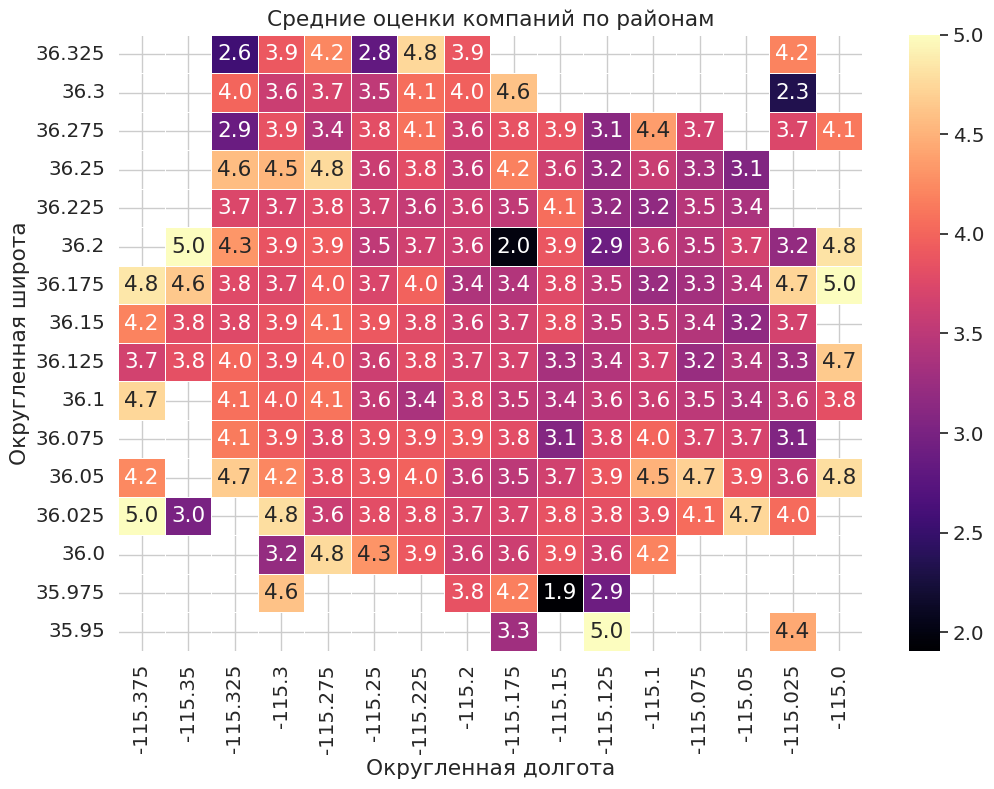

In [176]:
radius = 0.2

# Фильтруем компании в пределах радиуса от центра города
filtered_companies = merged_table[
    (merged_table['rounded_latitude'] >= city_center['latitude'] - radius) &
    (merged_table['rounded_latitude'] <= city_center['latitude'] + radius) &
    (merged_table['rounded_longitude'] >= city_center['longitude'] - radius) &
    (merged_table['rounded_longitude'] <= city_center['longitude'] + radius)
]

# Создаем сводную таблицу
pivot_table = pd.pivot_table(filtered_companies, values='Average rating', index='rounded_latitude', columns='rounded_longitude', aggfunc='mean')

# Строим график
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='magma', annot=True, fmt=".1f", linewidths=.5).invert_yaxis()
plt.title('Средние оценки компаний по районам')
plt.xlabel('Округленная долгота')
plt.ylabel('Округленная широта')
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Если в районе мало компаний, то сравнивать его с остальными только по среднему рейтингу компаний не корректно. Например, лучше было бы сравнить отзывы о районах от пользователей, потому что в таком случае измеряется общее "удобство". Также среднее очень сильно колеблется от оценки компаний из-за малого количества.

 Автоматическое подстроение цветовой гаммы под значения оценок может быть недостатком из-за того, минимальное и максимальное значения будут очень сильно выделяться цветом даже при небольшом различии в значениях. Однако это может явно показать, в каких районах лучшие показатели, а в каких худшие.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

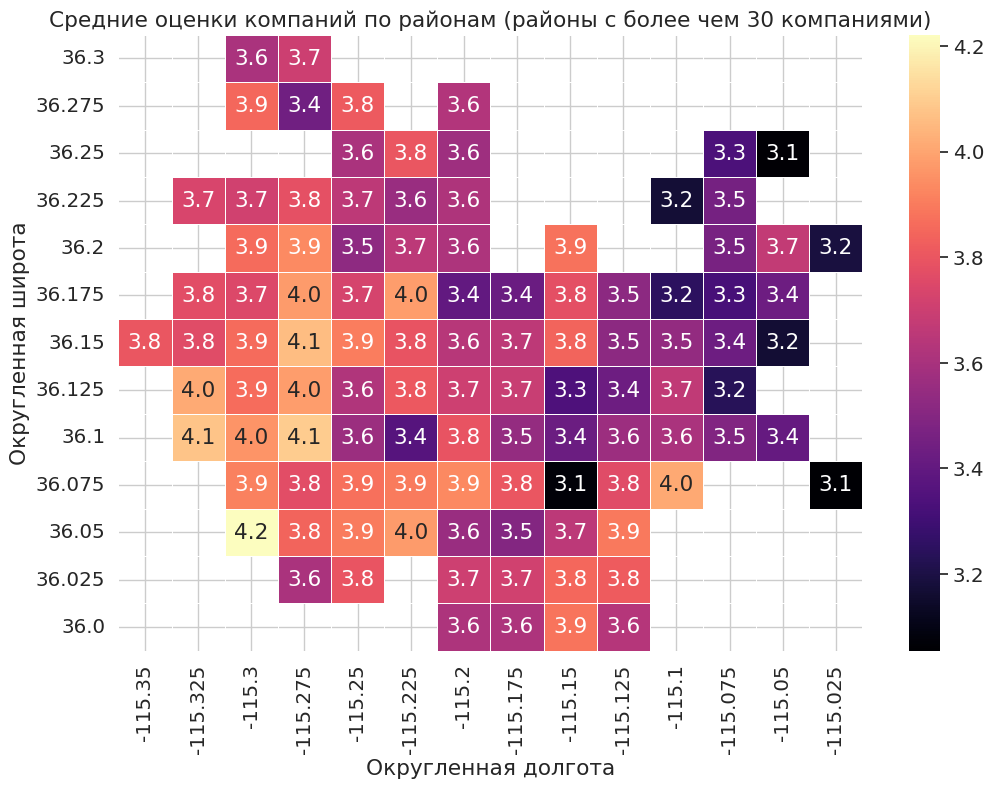

In [177]:
# Группируем районы
companies_per_district = filtered_companies.groupby(['rounded_latitude', 'rounded_longitude']).size()

# Фильтруем районы, в которых количество компаний не менее 30
filtered_districts = companies_per_district[companies_per_district >= 30].index

# Оставляем только компании из выбранных районов
filtered_companies = filtered_companies.set_index(['rounded_latitude', 'rounded_longitude']).loc[filtered_districts].reset_index()

# Строим сводную таблицу средних оценок компаний по районам
pivot_table = pd.pivot_table(filtered_companies, values='Average rating', index='rounded_latitude', columns='rounded_longitude', aggfunc='mean')

# Строим график
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='magma', annot=True, fmt=".1f", linewidths=.5).invert_yaxis()
plt.title('Средние оценки компаний по районам (районы с более чем 30 компаниями)')
plt.xlabel('Округленная долгота')
plt.ylabel('Округленная широта')
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** На втором графике лучше видны различия между районами, а также большое количество районов просто пропали с карты, так как количество компаний в них меньше 30. Одним из сильных преимуществ второго графика является отсутствие выбросов: районов, где средняя оценка очень низкая или очень высокая (примеры 5.0 и 1.9 на первом графике, которых нет на втором) из-за того, что там мало компаний.

Можно сделать вывод, что следует как-то (зависит от данных) отбирать данные, чтобы оценка была более "честная".

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

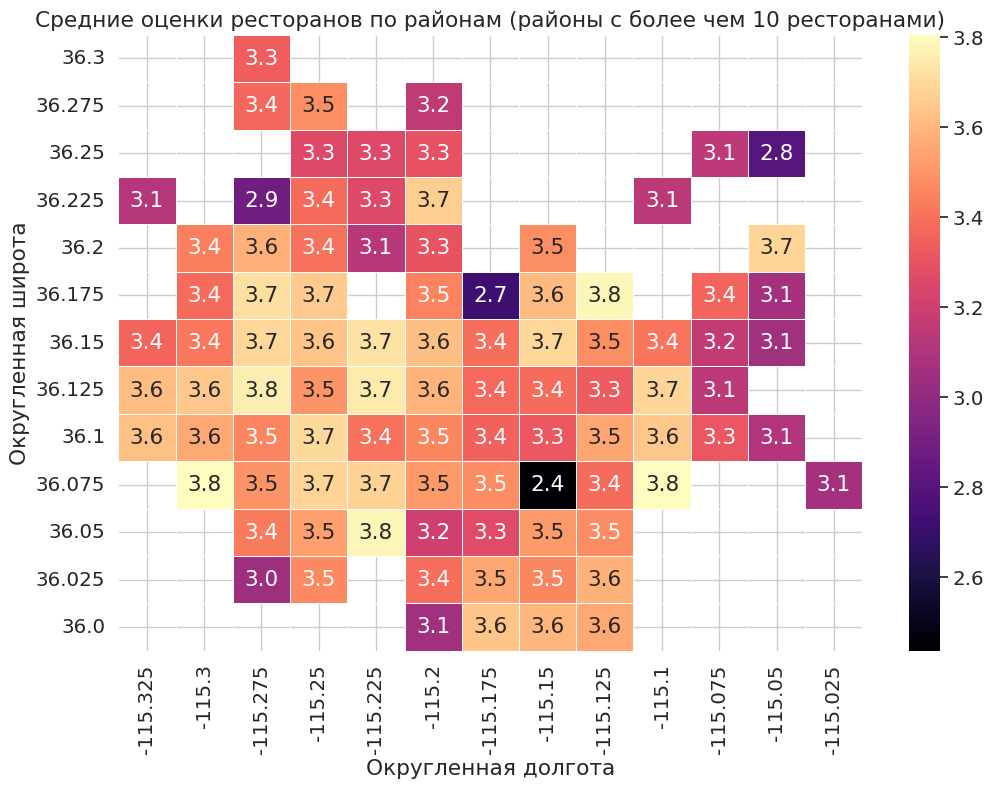

In [178]:
# Отбираем все рестораны
restaurants_in_city_N = merged_table[merged_table['categories'].str.contains('restaurant', case=False, na=False)]

# Из всех берем только те, у которых не менее 5 отзывов
restaurants_in_city_N = restaurants_in_city_N[restaurants_in_city_N['Count of reviews'] >= 5]


radius = 0.3

# Фильтруем рестораны в пределах радиуса от центра города
filtered_companies = restaurants_in_city_N[
    (restaurants_in_city_N['rounded_latitude'] >= city_center['latitude'] - radius) &
    (restaurants_in_city_N['rounded_latitude'] <= city_center['latitude'] + radius) &
    (restaurants_in_city_N['rounded_longitude'] >= city_center['longitude'] - radius) &
    (restaurants_in_city_N['rounded_longitude'] <= city_center['longitude'] + radius)
]

companies_per_district = filtered_companies.groupby(["rounded_latitude", "rounded_longitude"]).size()

# Фильтруем районы, в которых количество ресторанов больше или равно 10
filtered_districts = companies_per_district[companies_per_district >= 10].index

# Оставляем только рестораны из выбранных районов
filtered_companies = (
    filtered_companies.set_index(["rounded_latitude", "rounded_longitude"]).loc[filtered_districts].reset_index()
)

pivot_table = pd.pivot_table(
    filtered_companies,
    values="Average rating",
    index="rounded_latitude",
    columns="rounded_longitude",
    aggfunc="mean",
)

# Строим график
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="magma", annot=True, fmt=".1f", linewidths=0.5).invert_yaxis()

plt.title("Средние оценки ресторанов по районам (районы с более чем 10 ресторанами)")
plt.xlabel("Округленная долгота")
plt.ylabel("Округленная широта")
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Такие ограничения полезны тем, что мы сразу отбрасываем какие-то странные рестораны (а иначе почему у них так мало отзывов?), чтобы почистить данные. А ограничение на количество ресторанов в районе дает нам более честное сравнение различных районов.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [179]:
# Отбираем рестораны с большим количеством отзывов
cool_restaurants_in_city_N = restaurants_in_city_N[restaurants_in_city_N['Count of reviews'] >= 50]

# Сортируем их по рейтингу
sorted_cool_restaurants_in_city_N = cool_restaurants_in_city_N.sort_values(by='Average rating', ascending=False).head(10)

# Выбираем только нужные колонки
sorted_cool_restaurants_in_city_N = sorted_cool_restaurants_in_city_N[['name', 'Average rating', 'Count of reviews', 'latitude', 'longitude', 'categories']]

# Выводим список
sorted_cool_restaurants_in_city_N.head(10)

name  Average rating  \
business_id                                                             
iBPyahdJRP5y0t25fF2W9w    "Lip Smacking Foodie Tours"        4.966480   
Fmij544FE1iOruoxI41kew                 "Pepito Shack"        4.907692   
qw9SyduMZ53KB6GlBQqvZQ               "Bosa Boba Cafe"        4.890909   
k9b96JXlNewj36ddrce9Jw                 "Garden Grill"        4.868132   
IhNASEZ3XnBHmuuVnWdIwA                 "Brew Tea Bar"        4.848069   
k5ddmLvAKKw9zSusRPM2cQ               "Poppa Naps BBQ"        4.836538   
8fFTJBh0RB2EKG53ibiBKw               "Zenaida's Cafe"        4.833333   
l1GJnB9TJgGgEeI4at1M0A   "El Frescos Cocina Mexicana"        4.816754   
hFT3HuxVZJb1uYEsYfp-0A  "Blaqcat Ultra Hookah Lounge"        4.809524   
wZkjm9TGa7nXLYHxhIRO5w     "California Sushi Burrito"        4.807018   

                        Count of reviews   latitude   longitude  \
business_id                                                       
iBPyahdJRP5y0t25fF2W9w               179  36.114537 -115.172678   
Fmij544FE1iOruoxI41kew                65  36.152477 -115.151945   
qw9SyduMZ53KB6GlBQqvZQ                55  36.125960 -115.184846   
k9b96JXlNewj36ddrce9Jw                91  36.166783 -115.286197   
IhNASEZ3XnBHmuuVnWdIwA              1165  36.054195 -115.242443   
k5ddmLvAKKw9zSusRPM2cQ               104  36.116549 -115.088115   
8fFTJBh0RB2EKG53ibiBKw               180  36.101741 -115.100359   
l1GJnB9TJgGgEeI4at1M0A               191  36.098527 -115.148446   
hFT3HuxVZJb1uYEsYfp-0A                63  36.159742 -115.232738   
wZkjm9TGa7nXLYHxhIRO5w                57  36.125636 -115.202487   

                                                               categories  
business_id                                                                
iBPyahdJRP5y0t25fF2W9w  Food Tours;Restaurants;Event Planning & Servic...  
Fmij544FE1iOruoxI41kew  Restaurants;Burgers;Food Stands;Sandwiches;Hot...  
qw9SyduMZ53KB6GlBQqvZQ  Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...  
k9b96JXlNewj36ddrce9Jw  Tacos;Street Vendors;Farmers Market;Vegetarian...  
IhNASEZ3XnBHmuuVnWdIwA  Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...  
k5ddmLvAKKw9zSusRPM2cQ  Food Stands;Hot Dogs;Caterers;Restaurants;Amer...  
8fFTJBh0RB2EKG53ibiBKw               Restaurants;Breakfast & Brunch;Cafes  
l1GJnB9TJgGgEeI4at1M0A  Caterers;Mexican;Restaurants;Food;Event Planni...  
hFT3HuxVZJb1uYEsYfp-0A  Adult Entertainment;Lounges;Hookah Bars;Restau...  
wZkjm9TGa7nXLYHxhIRO5w  Asian Fusion;Fast Food;Restaurants;Japanese;Po...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [181]:
# Оставляем только рестораны с рейтингом не менее 4.7
cool_restaurants_in_city_N = cool_restaurants_in_city_N[cool_restaurants_in_city_N['Average rating'] >= 4.7]

# Для удобства раскрашивания я добавил такую колонку. Изначально для всех стоит значение No
cool_restaurants_in_city_N['Is in top?'] = 'No'

# Устанавливаем значение Yes для 10 лучших
cool_restaurants_in_city_N.loc[cool_restaurants_in_city_N['name'].isin(sorted_cool_restaurants_in_city_N['name']), 'Is in top?'] = 'Yes'

# Загружаем данные в карту
fig = px.scatter_mapbox(cool_restaurants_in_city_N, lat="latitude", lon="longitude", hover_name="name",
                        hover_data={"Average rating" : True, "Count of reviews" : True, "categories" : True},
                        zoom=10, color='Is in top?', color_discrete_map={'No': 'blue', 'Yes': 'red'})


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker=dict(size=10))
fig.update_layout(title='Карта ресторанов с рейтингом не менее 4.7')

fig.show()
fig.write_html("interactive_map3_Best_Restaurants_in_Las_Vegas.html")

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий слишком предвзято относится, но на то он и кот.

В задаче мы нашли город с самым большим количеством компаний. Это оказался Лас-Вегас. В нем мы просмотрели средние оценки компаний, а после разделили на районы и посмотрели средние оценки по районам. Затем мы также посмотрели всё отдельно для ресторанов. В конце построили карту с лучшими ресторанами. Сравнив полученные графики, стоит отметить, что при анализе групп данных следует убирать группы с маленьким количеством вошедшей информации.